# Analysis of Physical Oceanographic Data - SIO 221A
### Python version of [Sarah Gille's](http://pordlabs.ucsd.edu/sgille/sioc221a/index.html) notes by:
#### Bia Villas Bôas (avillasboas@ucsd.edu) & Gui Castelão (castelao@ucsd.edu)

## Lecture 6

#### *Recap*

Last time we looked at the Fourier transform.  We considered cosine and
sine transforms, derived coefficients ($a_q$ and $b_q$) for cosine and
sine, and then showed that we could recombine these to make complex
coefficients for $e^{i2\pi qf_1t}$ and $e^{-i2\pi qf_1t}$.
We found these coefficients to be complex conjugates of each other.
Since cosine/sine transformations and Fourier transforms using
$e^{\pm i2\pi qf_1t}$ are closely related, we can express results of one
in terms of the other.
In other words, instead of computing $\sum_{j=1}^N x_j \cos(2\pi f_j t)$ and
$\sum_{j=1}^N x_j \sin(2 \pi f_j t)$, we can instead find
$\sum_{j=1}^N x_j \exp(i 2 \pi f_j t)$ and then use the real and imaginary
parts to represent the cosine and sine components.

#### *Fourier transform in continuous form*

We finished up last time by looking at the notation for a Fourier transform in continuous form.
Bendat and Piersol use the following:

$$\begin{eqnarray}
X(\omega) & = & \int_{-\infty}^{\infty} x(t) e^{-i2\pi t\omega}\, dt \hspace{3cm} (1)\\
x(t) & = & \int_{-\infty}^{\infty} X(\omega)  e^{i2\pi t\omega}\, d\omega \hspace{2.8cm} (2)
\end{eqnarray}$$

Data come in discrete form.  If they are uniformly separated (in time or space), then they
are easy to Fourier transform.
The same questions about
choices of notation apply in the discrete form that we consider when we
analyze data.  And we can get ourselves really confused.  So we have to keep
in mind one rule:  we don't get to create energy.  That means that we need
to have the same total variance in our data set in the time domain as we
have in the frequency domain.  This is Parseval's theorem, and we'll return
to it.

One of the glories of the Fourier transform is that we can take all of these
projections and make them extremely efficient through the Fast Fourier
Transform (FFT).  In principle, FFT's are most efficient if you
compute them for records that are a power of 2 in length, so 64 or 128 or 256
points for example.  But modern FFTs are fast even if your data set doesn't
have $2^n$ elements. Moreover, a year doesn't have $2^n$ days, so trying to
force a data record to conform to a length of $2^n$ can suppress some of the
natural periodicity.

Mathematically the Python definitions look like this:
\begin{equation}
A_k = \sum_{m=0}^{n-1} a_m \exp \left(-2\pi i \frac{m k}{n}\right),\ \ k = 0,..., n-1 \hspace{2.1cm} (3)
\end{equation}
where frequency labels $k$ and data labels $m$ go from 0 to $N-1$.  Here
capital letters are used to denote Fourier transformed variables.
Python computes this using function ``fft`` from the ``numpy.fft`` library.

The inverse of the Fourier  transform is computed using the function ``ifft`` and is defined to be:

\begin{equation}
a_k = \frac{1}{n}\sum_{k=0}^{n-1} A_k \exp \left(2\pi i \frac{m k}{n}\right),\ \ m = 0, ..., n-1. \hspace{2.1cm} (4)
\end{equation}

In Python the Fourier transform and inverse Fourier transform become:

`` f = numpy.fft.fft(x)``

``x_new = numpy.fft.ifft(f)``

To make Parseval's theorem work, the variance of our data has to equal the variance of the Fourier transform.  Thus we'll want to compare:

``sum(x**2)``

``sum(abs(f)**2)``

``numpy.dot(f.T, f)``

``sum(f*f.conj())``

Let's try that on some fake data.

In [1]:
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 4000
T = 10
t = np.linspace(0, 10*T, N)
x = 5*np.sin(2*np.pi*t/T) + (np.random.random(N) - 0.5)
print('Mean = %.2f' %x.mean())

Mean = -0.00


In [3]:
f = np.fft.fft(x)
x_new = np.fft.ifft(f)

In [4]:
print('Sum of x^2 = %.2f' %sum(x**2))
print('Sum(abs(f)**2) = %.2f' %sum(abs(f)**2))
print('numpy.dot(f.T, f) = %.2f' %np.dot(f.T, f))
print('sum(f*numpy.conj(f)) = %.2f' %sum(f*f.conj()))

Sum of x^2 = 50358.59
Sum(abs(f)**2) = 201434362.14
numpy.dot(f.T, f) = -200049378.49
sum(f*numpy.conj(f)) = 201434362.14


They don't quite agree, so we'll see that we should divide the Fourier transform by $N$, the number of data points.

#### *What do we gain by Fourier transforming our data?*

We live life in the time domain, so it's sometimes hard to think about
the world as seen in the frequency domain.
While linear trends aren't well represented by the Fourier transform, the
Fourier tranform is particularly effective for representing  sinusoidal
oscillations.
Solar radiation that warms the Earth varies
on a 365.25 day cycle with the seasons, and on a 24 hour cycle, with the
rising and setting of the sun.  Ocean tides vary at semidiurnal (12.4 hour)
and diurnal frequencies (as well as being modulated on fortnightly
and monthly intervals.)
In fact
Thus if you look at data from a tide gauge, you see oscillatory
fluctuations at a variety of different frequencies, as shown in
the slides.  If we solve for the tidal amplitudes, we
find for example:

| Symbol | Frequency (cpd)| Amplitude (cm)| Greenwich Epoch|
|-----|-----|-----|-----|
|O1|0.92953571|8.91|217|
|P1|0.99726209|5.32|224|
|K1|1.00273791|16.12|225|
|M2|1.93227361|9.97|354|
|S2|2.00000000|6.45|357|

The complex Fourier coefficients might seem confusing, but
they give us a lot of information about our data, allowing us, for
example to tell whether there is more energy at frequency $\sigma_j$
compared with frequency $\sigma_l$.  The Fourier coefficients are complex
so this comparison might seem confusing, but we'll just examine the
squared magnitudes of the coefficients:  $|a_j|^2$.

Of course, if we knew the frequency exactly, we could just
do a least-squares fit, but often we aren't exactly sure of the frequencies
in question---there might be energy spread over a broad range of frequencies,
and the Fourier tranform provides us with a way to examine our data in terms
of oscillatory signals.


#### Three great traits of the Fourier transform

We've talked about the effectiveness of the Fourier transform for
identifying frequencies that are particularly energetic
without having to know a priori what frequencies might have resonant peaks, and
we've noted that the Fourier transform is useful for evaluating the size of
one peak relative to another.

##### 1. *Derivatives in time become multiplication in the frequency domain.*

Fourier coefficients have some additional mathematical power.  For example,suppose I want to take the time derivative of my data.  If I start with

$$\begin{equation}
A(t) = \sum_{n=-\infty}^\infty a_n e^{-i2\pi f_n t}  \hspace{2.1cm} (5)
\end{equation}$$

then
$$\begin{equation}
\frac{\partial A(t)}{\partial t} = \sum_{n=-\infty}^\infty a_n \frac{\partial e^{-i2\pi f_n t}}{\partial t} = \sum_{n=-\infty}^\infty -i2\pi f_n a_n e^{-i2\pi f_n t}  \hspace{2.1cm} (6)
\end{equation}$$

So the first derivative become a multiplication by frequency.
Higher derivatives are similarly simple

$$\begin{equation}
\frac{\partial^q A(t)}{\partial t^q} = \sum_{n=-\infty}^\infty (-i2\pi f_n)^q a_n e^{-i2\pi f_n t}.
 \hspace{2.1cm} (7)
\end{equation}$$

Integration can be represented as a division operation:

$$\begin{equation}
\int{A(t)}\, dt = \sum_{n=-\infty}^\infty (i2\pi f_n)^{-1} a_n e^{i2\pi f_n t} \hspace{2.1cm} (8)
\end{equation}$$

though we'll run into a bit of trouble if $f_0\ne 0$, that is if the record
has a non-zero mean.  That can mean that we might want to remove the mean
before we start doing anything more complicated.

In class we illustrated this by looking at the time series of the
Southern Annular Mode from http://www.nerc-bas.ac.uk/icd/gjma/sam.html I had done a bit of pre-editing of the ASCII data file to remove the header and make it a full matrix.  Then we did the following

In [5]:
import pandas as pd

In [6]:
path = 'http://www.nerc-bas.ac.uk/public/icd/gjma/newsam.1957.2007.txt'
df = pd.read_csv(path, header=[0], skiprows=0, sep='\s+')

In [7]:
df.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
1957,-0.87,-2.27,0.07,-1.97,-2.50,-0.87,1.00,-1.73,0.72,-3.12,-5.42,-2.63
1958,0.04,-2.84,-2.52,-0.30,-2.72,-0.97,-1.65,0.97,1.90,-0.16,0.30,0.82
1959,1.59,-0.19,-0.54,-1.25,-0.32,-1.12,0.18,-1.64,2.46,-0.46,3.28,-0.38
1960,0.90,0.85,3.40,-0.35,-0.60,-0.17,0.31,0.43,1.41,-1.17,1.18,1.36
1961,0.91,-4.00,-0.40,-0.14,1.12,-0.40,0.98,1.10,-1.21,1.64,1.52,2.32


In [8]:
df.tail()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
2016,3.13,1.35,4.36,1.06,-0.92,3.66,0.81,-1.28,2.46,-0.89,-3.12,-1.52
2017,-1.12,-1.09,-1.56,1.65,1.82,1.98,0.16,0.31,0.42,-0.64,3.18,1.44
2018,2.72,1.02,-0.03,-1.66,0.01,-1.57,0.55,-0.78,1.83,2.76,2.84,1.44
2019,2.79,-1.87,1.47,0.86,-0.11,2.21,-2.20,-2.04,0.81,-1.97,-4.42,-1.78
2020,0.57,-0.36,2.05,-1.72,1.03,1.18,-0.97,-2.20,-0.25,NaN,NaN,NaN


We want a continuous timeseries, so let's stack all years together:

In [84]:
SAM = []
for year in df.index.values:
    SAM.extend(df.loc[year].values.tolist())
SAM = np.array(SAM[:-3]) # We don't wanna grab the last three values
nt = len(SAM)

In [94]:
fft_data = np.fft.fft(SAM) # FFT of the data
fft_ddata = np.fft.fft(np.diff(SAM)) # FFT of the first derivative of the date

Here we are plotting the squared amplitude of the fft for both the data and its derivative. Note the symmetry, since we haven't truncated at the Nyquist frequency.

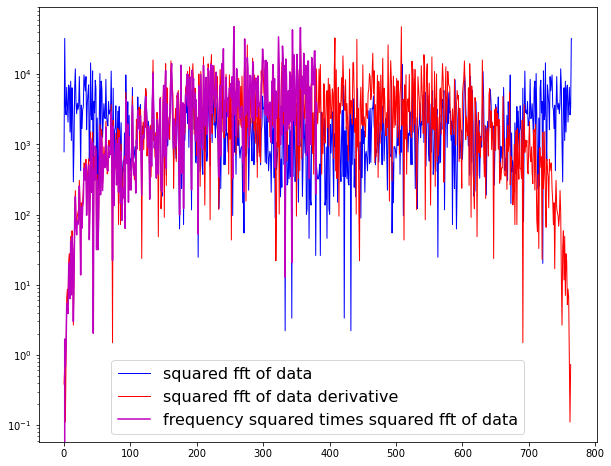

In [105]:
plt.figure(figsize=(10, 8))
plt.semilogy(range(nt), abs(fft_data)**2, 'b', lw=0., label='squared fft of data')
plt.semilogy(range(nt-1), abs(fft_ddata)**2, 'r', lw=1, label='squared fft of data derivative')
plt.semilogy(range(int(nt/2)),  abs(fft_data[:int(nt/2)])**2*np.arange(int(nt/2))**2/nt/25,
             'm', label='frequency squared times squared fft of data')
plt.legend(fontsize=16)

Here we've done this is the sloppiest way possible, but it still gives us a demonstration that the fft of the first derivative has the same spectral structure as the fft multiplied by frequency.

##### 2. *Fourier transforms simplify convolution.*

Suppose you plot some noisy data---the data features crazy amplitude swings,
and no one can make any sense of it, but you think that hiding behind
all this noise, there might be a slowly varying signal.  You might be told,
just do a running mean to smooth it out.   That running mean is a convolution.

Convolution plays an important role in thinking about the Fourier
transform, so we need to spend a little time on the concept.
Here's the basic convolution integral:

$$\begin{equation}
y(t) = \int_{-\infty}^{\infty} h(\tau) x(t-\tau) d\tau.  \hspace{2.1cm} (9)
\end{equation}$$

You can think of $x$ as the data, and $h$ as a filtering operator (such as
a ``boxcar`` filter, or a triangle filter, or a roughly Gaussian-shaped window,
or anything else that suits you.

In ``Python`` you can do this as:

In [13]:
from scipy import signal
nw = 12
y1 = np.convolve(SAM, signal.boxcar(nw)/nw)

which produces the same results as:

In [14]:
y2 = signal.lfilter(np.ones(nw)/nw, 1, SAM)

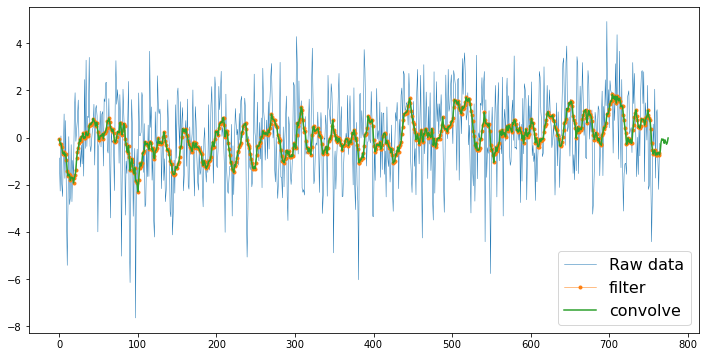

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(SAM, '-', lw=0.5, label='Raw data')
plt.plot(y2, '.-', lw=0.5, label='filter')
plt.plot(y1, '-', label='convolve')
plt.legend(fontsize=16)

Formally the notation for a convolution of two records $h$ and $x$ is written

$$\begin{equation}
h* x = \int_{-\infty}^\infty h(\tau)x(t - \tau) d\tau. \hspace{2.1cm} (10)
\end{equation}$$

What happens if we Fourier transform this?

$$\begin{eqnarray}
\mathcal{F}(h\ast x) & = &\int_{-\infty}^{\infty}\left[
\int_{-\infty}^\infty h(\tau)x(t - \tau) d\tau\right]e^{-i t2\pi f}\, dt  \hspace{2.1cm} (11)\\
 & = & \int_{-\infty}^{\infty}h(\tau) \int_{-\infty}^\infty \left[x(t - \tau)e^{-i t2\pi f}\, dt\right] d\tau  \hspace{2.1cm} (11)\\
 & = & \int_{-\infty}^{\infty}h(\tau)e^{-i\tau 2\pi f}\mathcal{F}(x(f))\, d\tau  \hspace{2.1cm} (13)\\
 & = & \mathcal{F}(h)\mathcal{F}(x)  \hspace{2.1cm} (14)
\end{eqnarray}$$

where here I've represented the Fourier transform with a script $\mathcal{F}$.

This has profound consequences.  It means that anything that required a
convolution in the time domain I can handle trivially in the Fourier
domain.  Suppose I want to filter my data.  If I don't like the hassle
of convolving, I can just Fourier transform, multiply by the Fourier transform
of my filter, and inverse Fourier transform.  This will prove to be
amazingly powerful.

3. *Parseval's theorem:  Total variance in the time domain equals total variance in the frequency domain*

The third trait of the Fourier transform is that it conserves energy
(or variance).  Formally, we refer to this as Parseval's theorem, and
we'll take a closer look later.
%Parseval's theorem is the form


Parsval's  theorem provides a critical link between total energy in the
time domain and total energy in the Fourier transform domain.  To think about
this, let's start by imagining computing the convolution of a data set with
itself.

What happens if I convolve my data ($x(t)$) with the time reversal of
itself ($x(-t)$)?
\begin{equation}
y(t) = \int_{-\infty}^{\infty} x(\tau) x(t+\tau) d\tau. \hspace{2.1cm} (15)
\end{equation}
More conventionally we might write:
\begin{equation}
y(\Delta t) = \int_{-\infty}^{\infty} x(t) x(\Delta t+t) dt.\hspace{2.1cm} (16)
\end{equation}
So we're looking at the data multiplied by itself for a time lag $\Delta t$.
At zero lag, this is the variance, and as we vary $\Delta t$ we're looking
at the lagged covariance for different time lags.